In [4]:
#文字雲
import jieba 
from collections import Counter
from PIL import Image # 圖片轉array陣列
import matplotlib.pyplot as plt
import pandas, numpy
import wordcloud #文字雲

import requests
from bs4 import BeautifulSoup
url="https://www.ptt.cc/bbs/Stock/index.html"

r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
result = soup.select("div.title")

In [7]:
push = []
for i in result:
    href = i.select_one("a")
    if href is None: # 刪文PASS
        pass
    elif '閒聊' in href.text: # 置頂閒聊
        post_url = 'https://www.ptt.cc'+ href.get('href')
        print(post_url)

        r = requests.get(post_url)
        soup = BeautifulSoup(r.text, "lxml")
        results = soup.select('span.article-meta-value')
        main_container = soup.find(id='main-container')
        all_text = main_container.text
        pre_text = all_text.split('--')[0]
        texts = pre_text.split('\n') 
        contents = texts[2:]
        # 內容
        content = '\n'.join(contents)

        push_container = soup.find_all(class_='push')  # 推文內容
        for article in push_container:
            messages = article.find('span', 'f3 push-content').getText()
            push.append(messages)

https://www.ptt.cc/bbs/Stock/M.1669701602.A.1BD.html


Building prefix dict from c:\Users\User\Documents\GitHub\Web_Scraping\Tools\dic_Zh.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u27e4dffaed7821044ea257980f789e10.cache
Loading model cost 0.223 seconds.
Prefix dict has been built successfully.


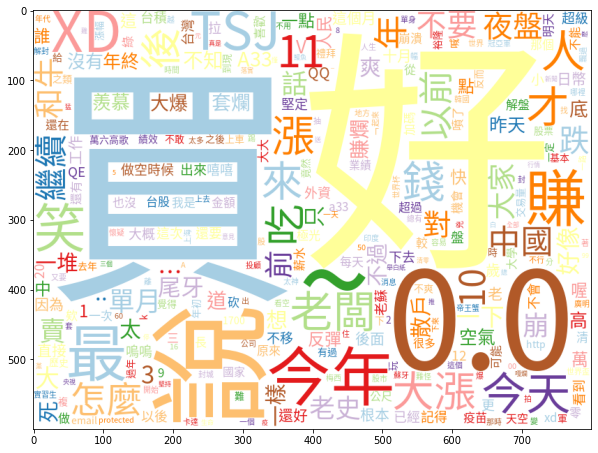

In [13]:
#推文格式調整
push_content = ''.join(push)
push_content = push_content.replace(' ','')

#設定字典及停用詞
jieba.set_dictionary('Tools\dic_Zh.txt')  # 繁體字典
with open('Tools\stops.txt', 'r', encoding='utf8') as f:  # 中文的停用字
    stops = f.read().split('\n') 

#新增停用詞
s = ['嗎','?','!','i','沒','不','。','˙','個月','月','.','真','應該','很','也是']
for w in s:
    stops.append(w)

#自訂義辭典
jieba.load_userdict(r'Tools\userDict.txt')

#斷詞
seg_list = jieba.lcut(push_content,cut_all=False)

#刪除停用詞
terms = []
for t in seg_list:
    if  t not in stops:
        terms.append(t)

#統計詞數量
dic = Counter(terms)

#文字雲設定
font_path='Tools\SourceHanSansTW-Regular.otf'

wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         #mask=mask,# 遮罩 有用的話則無視設定長寬
                         colormap='Paired',#viridis #顏色主題
                         font_path=font_path,# 設定字體
                         max_words=300, # 取多少文字在裡面
                         width=800, height=600, # 長寬解析度
                         relative_scaling=0.5 # 詞頻與詞大小關聯性
                         )

# 生成文字雲
wc.generate_from_frequencies(dic) # 吃入次數字典資料

# 顯示文字雲
plt.figure(figsize=(10,8))
plt.imshow(wc)
#wc.to_file("wordcloud.jpg")        